# **QUESTION 2 - SENTIMENT ANALYSIS**

# Requirements

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Reading data from CSV

In [2]:
data = pd.read_csv("reviews.csv",encoding='latin1')
data.tail()

,id,sentiment,date,text,Unnamed: 4,Unnamed: 5
3881,623499108,not_relevant,Tue Dec 09 08:30:04 +0000 2014,#AAPL:Accel Partners Leads $50M Series C Fundi...,NaN,NaN
3882,623499141,not_relevant,Tue Dec 09 11:52:37 +0000 2014,Counting down the minutes! Interest in full ti...,NaN,NaN
3883,623499180,not_relevant,Tue Dec 09 14:13:17 +0000 2014,@JustinPulitzer Any comment on #aapl today?,NaN,NaN
3884,623499194,not_relevant,Tue Dec 09 14:39:59 +0000 2014,Have been brave and taken out an #AAPL CFD as ...,NaN,NaN
3885,623499409,not_relevant,Tue Dec 09 21:27:06 +0000 2014,Tim Cook Met With Jesse Jackson for 'Positive ...,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3886 non-null   int64  
 1   sentiment   3886 non-null   object 
 2   date        3886 non-null   object 
 3   text        3886 non-null   object 
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 182.3+ KB


In [4]:
reviews = data['text']
reviews

0       WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...
1       @apple Contact sync between Yosemite and iOS8 ...
2       WARNING IF YOU BUY AN IPHONE 5S UNLOCKED FROM ...
3       @Apple, For the love of GAWD, CENTER the '1'on...
4       i get the storage almost full notification lit...
                              ...                        
3881    #AAPL:Accel Partners Leads $50M Series C Fundi...
3882    Counting down the minutes! Interest in full ti...
3883          @JustinPulitzer Any comment on #aapl today?
3884    Have been brave and taken out an #AAPL CFD as ...
3885    Tim Cook Met With Jesse Jackson for 'Positive ...
Name: text, Length: 3886, dtype: object

# Preprocessing and Feature Extraction

## *Bag of words based on raw counts*

In [5]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(reviews)
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

converting sentiment labels to integer

In [6]:
data['sentiment'] = data['sentiment'].replace('not_relevant',0)
data['sentiment'] = data['sentiment'].astype(int)
sentiments = data['sentiment'].values.reshape(-1, 1)
sentiments

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

Concatenating labels with text vectors

In [7]:
vector_with_labels = np.concatenate((x.toarray(), sentiments), axis=1)
vector_with_labels

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Splitting data into test and train

In [8]:
X_train, X_test, y_train, y_test = train_test_split(vector_with_labels[:, :-1], vector_with_labels[:, -1], test_size=0.25, random_state=42)

### Applying Classifiers

#### --> Logistic Regression

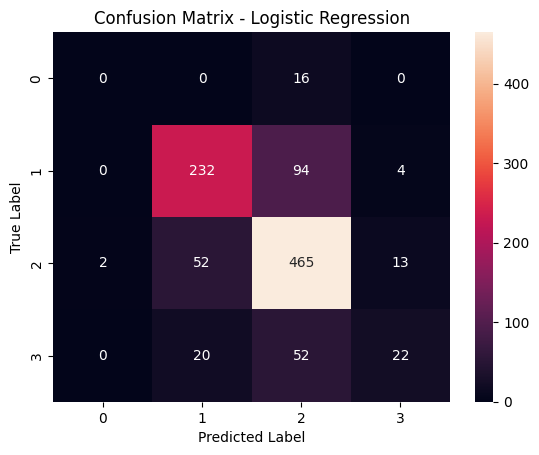

In [28]:
lgR = LogisticRegression(max_iter=1000)
lgR.fit(X_train, y_train)
predictions = lgR.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f_score = f1_score(y_test, predictions, average='weighted')

# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions, average='micro')
recall_micro = recall_score(y_test, predictions, average='micro')
f_score_micro = f1_score(y_test, predictions, average='micro')

precision_macro = precision_score(y_test, predictions, average='macro')
recall_macro = recall_score(y_test, predictions, average='macro')
f_score_macro = f1_score(y_test, predictions, average='macro')

conf_matrix_lr = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [29]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy],
         ["Precision", precision],
         ["Recall", recall],
         ["F-score", f_score],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|        Accuracy         | 0.7397119341563786  |
|        Precision        | 0.7195609062080797  |
|         Recall          | 0.7397119341563786  |
|         F-score         |  0.719647310541294  |
| Micro-average Precision | 0.7397119341563786  |
|  Micro-average Recall   | 0.7397119341563786  |
|  Micro-average F-score  | 0.7397119341563786  |
| Macro-average Precision | 0.5172218132744448  |
|  Macro-average Recall   | 0.45278325164943306 |
|  Macro-average F-score  | 0.4662760355405761  |
+-------------------------+---------------------+


#### --> Naive Bayes 

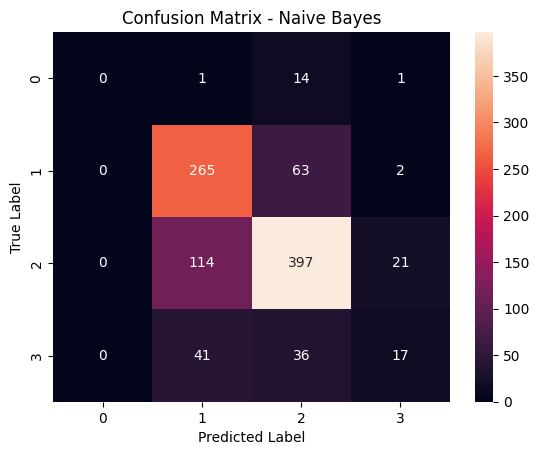

In [30]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
predictions_nb = naive_bayes_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, predictions_nb)
precision_nb = precision_score(y_test, predictions_nb, average='weighted', zero_division=0)
recall_nb = recall_score(y_test, predictions_nb, average='weighted')
f_score_nb = f1_score(y_test, predictions_nb, average='weighted')

# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_nb, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_nb, average='micro')
f_score_micro = f1_score(y_test, predictions_nb, average='micro')

precision_macro = precision_score(y_test, predictions_nb, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_nb, average='macro')
f_score_macro = f1_score(y_test, predictions_nb, average='macro')

conf_matrix_nb = confusion_matrix(y_test, predictions_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy_nb],
         ["Precision", precision_nb],
         ["Recall", recall_nb],
         ["F-score", f_score_nb],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|        Accuracy         |  0.698559670781893  |
|        Precision        | 0.6798568054696982  |
|         Recall          |  0.698559670781893  |
|         F-score         |  0.68101390179012   |
| Micro-average Precision |  0.698559670781893  |
|  Micro-average Recall   |  0.698559670781893  |
|  Micro-average F-score  |  0.698559670781893  |
| Macro-average Precision | 0.4556298001501742  |
|  Macro-average Recall   | 0.4325304920909624  |
|  Macro-average F-score  | 0.42989342803704206 |
+-------------------------+---------------------+


#### --> Random Forest

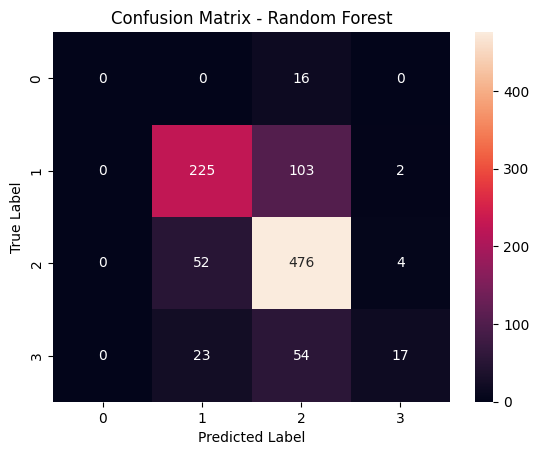

In [32]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
predictions_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, predictions_rf, average='weighted')
f_score_rf = f1_score(y_test, predictions_rf, average='weighted')

# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_rf, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_rf, average='micro')
f_score_micro = f1_score(y_test, predictions_rf, average='micro')

precision_macro = precision_score(y_test, predictions_rf, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_rf, average='macro')
f_score_macro = f1_score(y_test, predictions_rf, average='macro')

conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [33]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy_rf],
         ["Precision", precision_rf],
         ["Recall", recall_rf],
         ["F-score", f_score_rf],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|        Accuracy         | 0.7386831275720165  |
|        Precision        | 0.7275372863987456  |
|         Recall          | 0.7386831275720165  |
|         F-score         | 0.7118044013591833  |
| Micro-average Precision | 0.7386831275720165  |
|  Micro-average Recall   | 0.7386831275720165  |
|  Micro-average F-score  | 0.7386831275720165  |
| Macro-average Precision | 0.5556416225631406  |
|  Macro-average Recall   | 0.43935152193830806 |
|  Macro-average F-score  | 0.4527451333124492  |
+-------------------------+---------------------+


#### --> SVM

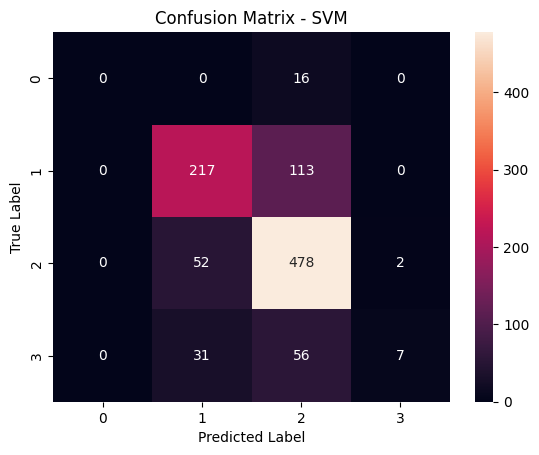

In [34]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
predictions_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, predictions_svm)
precision_svm = precision_score(y_test, predictions_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test, predictions_svm, average='weighted')
f_score_svm = f1_score(y_test, predictions_svm, average='weighted')

# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_svm, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_svm, average='micro')
f_score_micro = f1_score(y_test, predictions_svm, average='micro')

precision_macro = precision_score(y_test, predictions_svm, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_svm, average='macro')
f_score_macro = f1_score(y_test, predictions_svm, average='macro')

conf_matrix_svm = confusion_matrix(y_test, predictions_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [35]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy_svm],
         ["Precision", precision_svm],
         ["Recall", recall_svm],
         ["F-score", f_score_svm],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|        Accuracy         | 0.7222222222222222  |
|        Precision        | 0.7153957362199918  |
|         Recall          | 0.7222222222222222  |
|         F-score         | 0.6848868645704317  |
| Micro-average Precision | 0.7222222222222222  |
|  Micro-average Recall   | 0.7222222222222222  |
|  Micro-average F-score  | 0.7222222222222222  |
| Macro-average Precision | 0.5555191050779286  |
|  Macro-average Recall   | 0.40763502082091113 |
|  Macro-average F-score  | 0.40620280474649406 |
+-------------------------+---------------------+


#### --> Perceptron

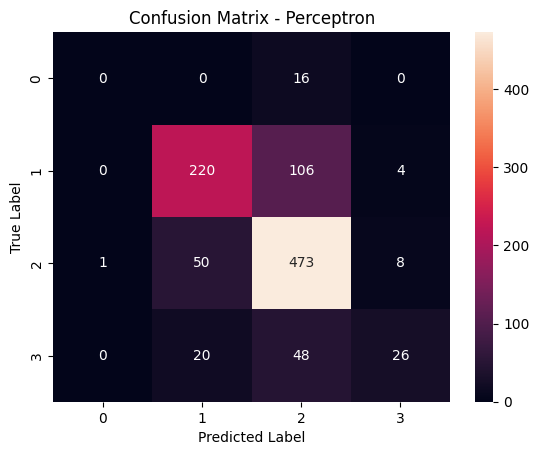

In [36]:
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
predictions_perceptron = perceptron_model.predict(X_test)


accuracy_perceptron = accuracy_score(y_test, predictions_perceptron)
precision_perceptron = precision_score(y_test, predictions_perceptron, average='weighted', zero_division=0)
recall_perceptron = recall_score(y_test, predictions_perceptron, average='weighted')
f_score_perceptron = f1_score(y_test, predictions_perceptron, average='weighted')

# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_perceptron, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_perceptron, average='micro')
f_score_micro = f1_score(y_test, predictions_perceptron, average='micro')

precision_macro = precision_score(y_test, predictions_perceptron, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_perceptron, average='macro')
f_score_macro = f1_score(y_test, predictions_perceptron, average='macro')

conf_matrix_perceptron = confusion_matrix(y_test, predictions_perceptron)
sns.heatmap(conf_matrix_perceptron, annot=True, fmt='d')
plt.title("Confusion Matrix - Perceptron")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy_perceptron],
         ["Precision", precision_perceptron],
         ["Recall", recall_perceptron],
         ["F-score", f_score_perceptron],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
|        Accuracy         | 0.7397119341563786 |
|        Precision        | 0.7263450914398012 |
|         Recall          | 0.7397119341563786 |
|         F-score         | 0.7196918180679841 |
| Micro-average Precision | 0.7397119341563786 |
|  Micro-average Recall   | 0.7397119341563786 |
|  Micro-average F-score  | 0.7397119341563786 |
| Macro-average Precision | 0.5446113809756331 |
|  Macro-average Recall   | 0.458090038927105  |
|  Macro-average F-score  | 0.477180799068239  |
+-------------------------+--------------------+


## *Bag of words based on TF-IDF*

In [40]:
tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(reviews)
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
tfidf_vectors_with_labels = np.concatenate((x.toarray(), sentiments), axis=1)
tfidf_vectors_with_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors_with_labels[:, :-1], tfidf_vectors_with_labels[:, -1], test_size=0.25, random_state=42)

### Applying Classifiers

#### --> Logistic Regression

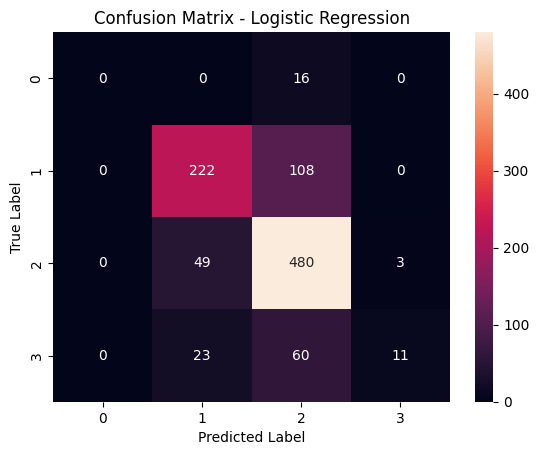

In [43]:
lgR = LogisticRegression(max_iter=1000)
lgR.fit(X_train, y_train)
predictions = lgR.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions, average='weighted')
f_score = f1_score(y_test, predictions, average='weighted')

# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions, average='micro')
f_score_micro = f1_score(y_test, predictions, average='micro')

precision_macro = precision_score(y_test, predictions, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions, average='macro')
f_score_macro = f1_score(y_test, predictions, average='macro')

conf_matrix_lr = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy],
         ["Precision", precision],
         ["Recall", recall],
         ["F-score", f_score],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|        Accuracy         | 0.7335390946502057  |
|        Precision        | 0.7280032197320399  |
|         Recall          | 0.7335390946502057  |
|         F-score         | 0.7005959380937015  |
| Micro-average Precision | 0.7335390946502057  |
|  Micro-average Recall   | 0.7335390946502057  |
|  Micro-average F-score  | 0.7335390946502058  |
| Macro-average Precision |  0.565926973198918  |
|  Macro-average Recall   | 0.4230010471051905  |
|  Macro-average F-score  | 0.42947943763161156 |
+-------------------------+---------------------+


#### --> Naive Bayes 

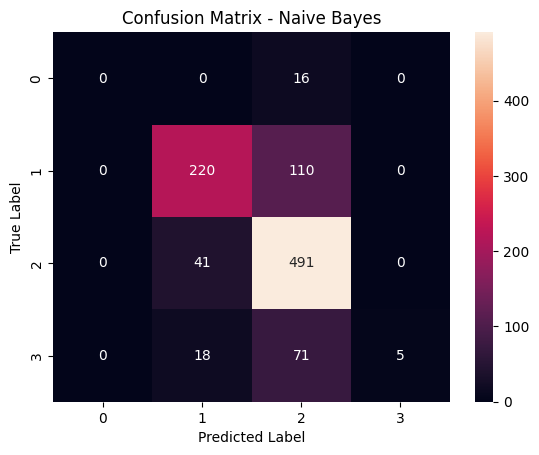

In [45]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
predictions_nb = naive_bayes_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, predictions_nb)
precision_nb = precision_score(y_test, predictions_nb, average='weighted', zero_division=0)
recall_nb = recall_score(y_test, predictions_nb, average='weighted')
f_score_nb = f1_score(y_test, predictions_nb, average='weighted')

# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_nb, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_nb, average='micro')
f_score_micro = f1_score(y_test, predictions_nb, average='micro')

precision_macro = precision_score(y_test, predictions_nb, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_nb, average='macro')
f_score_macro = f1_score(y_test, predictions_nb, average='macro')


conf_matrix_nb = confusion_matrix(y_test, predictions_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [46]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy_nb],
         ["Precision", precision_nb],
         ["Recall", recall_nb],
         ["F-score", f_score_nb],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|        Accuracy         | 0.7366255144032922  |
|        Precision        | 0.7550243399327198  |
|         Recall          | 0.7366255144032922  |
|         F-score         | 0.6956121278372115  |
| Micro-average Precision | 0.7366255144032922  |
|  Micro-average Recall   | 0.7366255144032922  |
|  Micro-average F-score  | 0.7366255144032922  |
| Macro-average Precision | 0.6255483141618738  |
|  Macro-average Recall   | 0.4106976217138591  |
|  Macro-average F-score  | 0.40710600717666856 |
+-------------------------+---------------------+


#### --> Random Forest

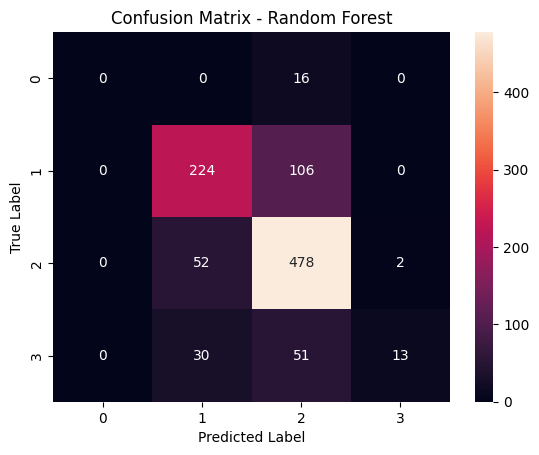

In [47]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
predictions_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, predictions_rf, average='weighted')
f_score_rf = f1_score(y_test, predictions_rf, average='weighted')

# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_rf, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_rf, average='micro')
f_score_micro = f1_score(y_test, predictions_rf, average='micro')

precision_macro = precision_score(y_test, predictions_rf, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_rf, average='macro')
f_score_macro = f1_score(y_test, predictions_rf, average='macro')


conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [48]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy_rf],
         ["Precision", precision_rf],
         ["Recall", recall_rf],
         ["F-score", f_score_rf],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
|        Accuracy         |  0.73559670781893  |
|        Precision        | 0.7342170267815079 |
|         Recall          |  0.73559670781893  |
|         F-score         | 0.7045185270582477 |
| Micro-average Precision |  0.73559670781893  |
|  Micro-average Recall   |  0.73559670781893  |
|  Micro-average F-score  | 0.7355967078189302 |
| Macro-average Precision | 0.5832369506942562 |
|  Macro-average Recall   | 0.428895497932452  |
|  Macro-average F-score  | 0.4377623969440323 |
+-------------------------+--------------------+


#### --> SVM

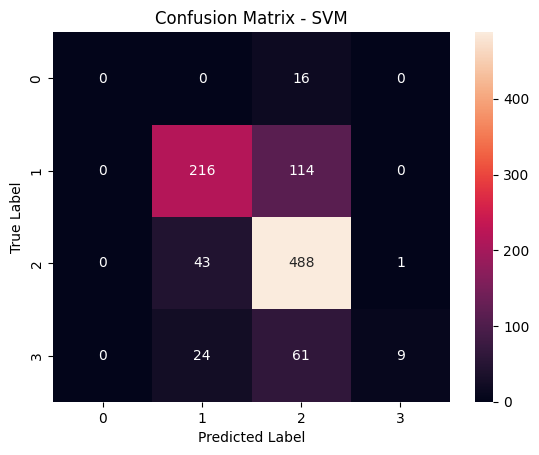

In [49]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
predictions_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, predictions_svm)
precision_svm = precision_score(y_test, predictions_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test, predictions_svm, average='weighted')
f_score_svm = f1_score(y_test, predictions_svm, average='weighted')

# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_svm, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_svm, average='micro')
f_score_micro = f1_score(y_test, predictions_svm, average='micro')

precision_macro = precision_score(y_test, predictions_svm, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_svm, average='macro')
f_score_macro = f1_score(y_test, predictions_svm, average='macro')


conf_matrix_svm = confusion_matrix(y_test, predictions_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy_svm],
         ["Precision", precision_svm],
         ["Recall", recall_svm],
         ["F-score", f_score_svm],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|        Accuracy         | 0.7335390946502057  |
|        Precision        | 0.7395301512174405  |
|         Recall          | 0.7335390946502057  |
|         F-score         | 0.6971125628610743  |
| Micro-average Precision | 0.7335390946502057  |
|  Micro-average Recall   | 0.7335390946502057  |
|  Micro-average F-score  | 0.7335390946502058  |
| Macro-average Precision | 0.5954887149570404  |
|  Macro-average Recall   | 0.41689584211980624 |
|  Macro-average F-score  | 0.42093831365948503 |
+-------------------------+---------------------+


#### --> Perceptron

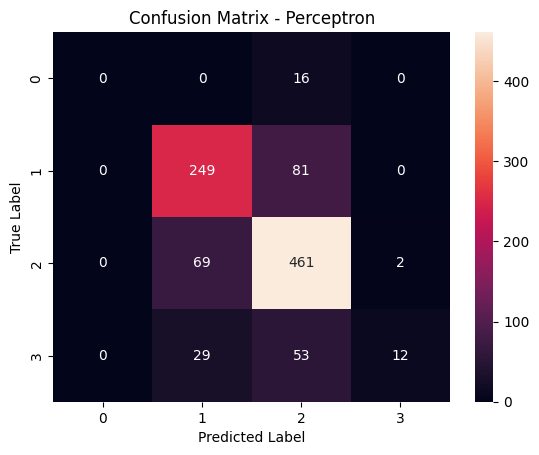

In [51]:
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
predictions_perceptron = perceptron_model.predict(X_test)


accuracy_perceptron = accuracy_score(y_test, predictions_perceptron)
precision_perceptron = precision_score(y_test, predictions_perceptron, average='weighted', zero_division=0)
recall_perceptron = recall_score(y_test, predictions_perceptron, average='weighted')
f_score_perceptron = f1_score(y_test, predictions_perceptron, average='weighted')


# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_perceptron, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_perceptron, average='micro')
f_score_micro = f1_score(y_test, predictions_perceptron, average='micro')

precision_macro = precision_score(y_test, predictions_perceptron, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_perceptron, average='macro')
f_score_macro = f1_score(y_test, predictions_perceptron, average='macro')

conf_matrix_perceptron = confusion_matrix(y_test, predictions_perceptron)
sns.heatmap(conf_matrix_perceptron, annot=True, fmt='d')
plt.title("Confusion Matrix - Perceptron")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [52]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy_perceptron],
         ["Precision", precision_perceptron],
         ["Recall", recall_perceptron],
         ["F-score", f_score_perceptron],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|        Accuracy         |  0.742798353909465  |
|        Precision        | 0.7394722393632335  |
|         Recall          |  0.742798353909465  |
|         F-score         | 0.7127301047177261  |
| Micro-average Precision |  0.742798353909465  |
|  Micro-average Recall   |  0.742798353909465  |
|  Micro-average F-score  |  0.742798353909465  |
| Macro-average Precision |  0.582305731548481  |
|  Macro-average Recall   | 0.43718659559924955 |
|  Macro-average F-score  | 0.44111740463756655 |
+-------------------------+---------------------+


## *NGrams Method*

In [53]:
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3))
x = ngram_vectorizer.fit_transform(reviews)
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
ngram_vectors_with_labels = np.concatenate((x.toarray(), sentiments), axis=1)
ngram_vectors_with_labels

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(ngram_vectors_with_labels[:, :-1], ngram_vectors_with_labels[:, -1], test_size=0.25, random_state=42)

### Applying Classifiers

#### --> Logistic Regression

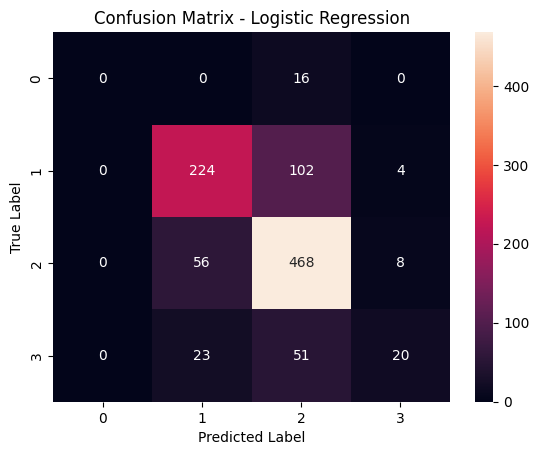

In [62]:
lgR = LogisticRegression(max_iter=1000)
lgR.fit(X_train, y_train)
predictions = lgR.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions, average='weighted')
f_score = f1_score(y_test, predictions, average='weighted')

# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions, average='micro')
f_score_micro = f1_score(y_test, predictions, average='micro')

precision_macro = precision_score(y_test, predictions, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions, average='macro')
f_score_macro = f1_score(y_test, predictions, average='macro')

conf_matrix_lr = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy],
         ["Precision", precision],
         ["Recall", recall],
         ["F-score", f_score],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
|        Accuracy         | 0.7325102880658436 |
|        Precision        | 0.7135468507168177 |
|         Recall          | 0.7325102880658436 |
|         F-score         | 0.7092179465712197 |
| Micro-average Precision | 0.7325102880658436 |
|  Micro-average Recall   | 0.7325102880658436 |
|  Micro-average F-score  | 0.7325102880658436 |
| Macro-average Precision | 0.5247419512359399 |
|  Macro-average Recall   | 0.442813271088747  |
|  Macro-average F-score  | 0.4564713948316412 |
+-------------------------+--------------------+


#### --> Naive Bayes 

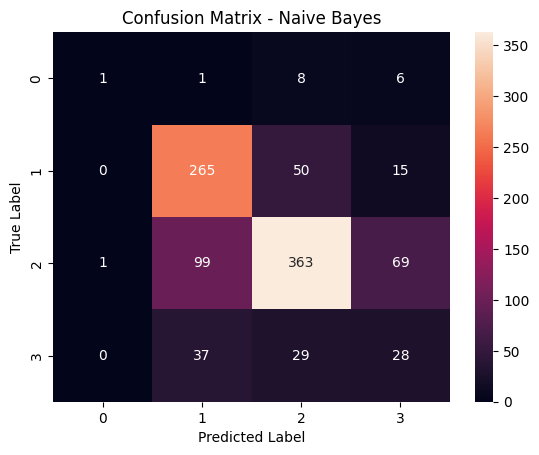

In [60]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
predictions_nb = naive_bayes_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, predictions_nb)
precision_nb = precision_score(y_test, predictions_nb, average='weighted', zero_division=0)
recall_nb = recall_score(y_test, predictions_nb, average='weighted')
f_score_nb = f1_score(y_test, predictions_nb, average='weighted')

# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_nb, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_nb, average='micro')
f_score_micro = f1_score(y_test, predictions_nb, average='micro')

precision_macro = precision_score(y_test, predictions_nb, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_nb, average='macro')
f_score_macro = f1_score(y_test, predictions_nb, average='macro')

conf_matrix_nb = confusion_matrix(y_test, predictions_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [61]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy_nb],
         ["Precision", precision_nb],
         ["Recall", recall_nb],
         ["F-score", f_score_nb],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|        Accuracy         | 0.6759259259259259  |
|        Precision        | 0.6964908074539765  |
|         Recall          | 0.6759259259259259  |
|         F-score         | 0.6778333350286364  |
| Micro-average Precision | 0.6759259259259259  |
|  Micro-average Recall   | 0.6759259259259259  |
|  Micro-average F-score  | 0.6759259259259259  |
| Macro-average Precision | 0.5507896955898474  |
|  Macro-average Recall   |  0.461433367630876  |
|  Macro-average F-score  | 0.45965332649896995 |
+-------------------------+---------------------+


#### --> Random Forest

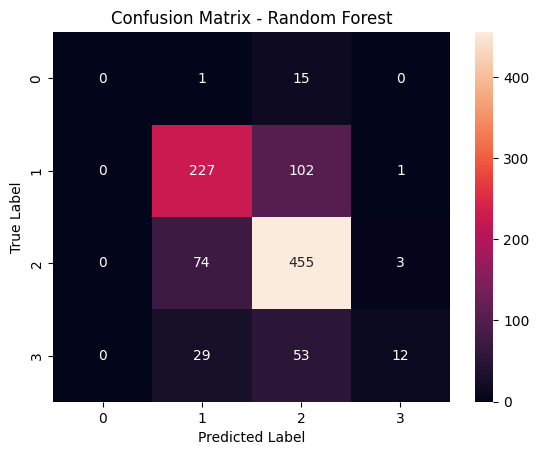

In [58]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
predictions_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, predictions_rf, average='weighted')
f_score_rf = f1_score(y_test, predictions_rf, average='weighted')


# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_rf, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_rf, average='micro')
f_score_micro = f1_score(y_test, predictions_rf, average='micro')

precision_macro = precision_score(y_test, predictions_rf, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_rf, average='macro')
f_score_macro = f1_score(y_test, predictions_rf, average='macro')


conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [59]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy_rf],
         ["Precision", precision_rf],
         ["Recall", recall_rf],
         ["F-score", f_score_rf],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|        Accuracy         | 0.7139917695473251  |
|        Precision        |  0.703817077567665  |
|         Recall          | 0.7139917695473251  |
|         F-score         | 0.6847660886205745  |
| Micro-average Precision | 0.7139917695473251  |
|  Micro-average Recall   | 0.7139917695473251  |
|  Micro-average F-score  | 0.7139917695473251  |
| Macro-average Precision | 0.5409501510574017  |
|  Macro-average Recall   | 0.41770038006040244 |
|  Macro-average F-score  | 0.4228841990422163  |
+-------------------------+---------------------+


#### --> SVM

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
predictions_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, predictions_svm)
precision_svm = precision_score(y_test, predictions_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test, predictions_svm, average='weighted')
f_score_svm = f1_score(y_test, predictions_svm, average='weighted')


# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_svm, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_svm, average='micro')
f_score_micro = f1_score(y_test, predictions_svm, average='micro')

precision_macro = precision_score(y_test, predictions_svm, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_svm, average='macro')
f_score_macro = f1_score(y_test, predictions_svm, average='macro')


conf_matrix_svm = confusion_matrix(y_test, predictions_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Results can't be computed for SVM with Ngrams as it takes very long time and too much computation

#### --> Perceptron

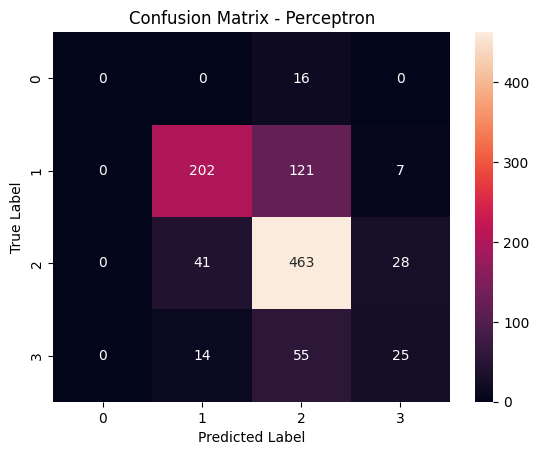

In [56]:
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
predictions_perceptron = perceptron_model.predict(X_test)

accuracy_perceptron = accuracy_score(y_test, predictions_perceptron)
precision_perceptron = precision_score(y_test, predictions_perceptron, average='weighted', zero_division=0)
recall_perceptron = recall_score(y_test, predictions_perceptron, average='weighted')
f_score_perceptron = f1_score(y_test, predictions_perceptron, average='weighted')


# Calculate micro and macro averages
precision_micro = precision_score(y_test, predictions_perceptron, average='micro', zero_division=0)
recall_micro = recall_score(y_test, predictions_perceptron, average='micro')
f_score_micro = f1_score(y_test, predictions_perceptron, average='micro')

precision_macro = precision_score(y_test, predictions_perceptron, average='macro', zero_division=0)
recall_macro = recall_score(y_test, predictions_perceptron, average='macro')
f_score_macro = f1_score(y_test, predictions_perceptron, average='macro')


conf_matrix_perceptron = confusion_matrix(y_test, predictions_perceptron)
sns.heatmap(conf_matrix_perceptron, annot=True, fmt='d')
plt.title("Confusion Matrix - Perceptron")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [57]:
# Print metrics
print("Metrics:")
table = [["Metric", "Value"],
         ["Accuracy", accuracy_perceptron],
         ["Precision", precision_perceptron],
         ["Recall", recall_perceptron],
         ["F-score", f_score_perceptron],
         ["Micro-average Precision", precision_micro],
         ["Micro-average Recall", recall_micro],
         ["Micro-average F-score", f_score_micro],
         ["Macro-average Precision", precision_macro],
         ["Macro-average Recall", recall_macro],
         ["Macro-average F-score", f_score_macro]]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))

Metrics:
+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
|        Accuracy         | 0.7098765432098766  |
|        Precision        | 0.6940319551495294  |
|         Recall          | 0.7098765432098766  |
|         F-score         | 0.6920403096115565  |
| Micro-average Precision | 0.7098765432098766  |
|  Micro-average Recall   | 0.7098765432098766  |
|  Micro-average F-score  | 0.7098765432098766  |
| Macro-average Precision | 0.47738227839328323 |
|  Macro-average Recall   | 0.4370948527023555  |
|  Macro-average F-score  | 0.44825964605870144 |
+-------------------------+---------------------+
